In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [20]:
df=pd.read_csv('Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
df.shape

(500, 9)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [12]:
df.duplicated().sum()

0

In [13]:
df.drop(columns=['Serial No.'], inplace=True)

In [14]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [15]:
#Split data
X= df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [16]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [17]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=24)

In [22]:
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [24]:
X_train_scaled

array([[0.76      , 0.64285714, 0.75      , ..., 0.71428571, 0.75      ,
        1.        ],
       [1.        , 0.82142857, 1.        , ..., 0.85714286, 0.84935897,
        1.        ],
       [0.44      , 0.39285714, 0.5       , ..., 0.71428571, 0.63461538,
        0.        ],
       ...,
       [0.64      , 0.78571429, 1.        , ..., 0.71428571, 0.68589744,
        1.        ],
       [0.34      , 0.46428571, 0.25      , ..., 0.57142857, 0.41666667,
        0.        ],
       [0.38      , 0.67857143, 0.25      , ..., 0.71428571, 0.39423077,
        0.        ]])

In [36]:
model=Sequential()

model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='linear'))

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 7)                 56        
                                                                 
 dense_4 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [42]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0087 - val_loss: 0.0079
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0086 - val_loss: 0.0078
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0086 - val_loss: 0.0078
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0085 - val_loss: 0.0077
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0084 - val_loss: 0.0077
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0084 - val_loss: 0.0077
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0083 - val_loss: 0.0077
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0082 - val_loss: 0.0076
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0081 - val_loss: 0.0076
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0080 - val_loss: 0.0076
Epoch 11/

In [43]:
y_pred=model.predict(X_test_scaled)

4/4 [==============================] - 0s 2ms/step


In [44]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7655051779765889

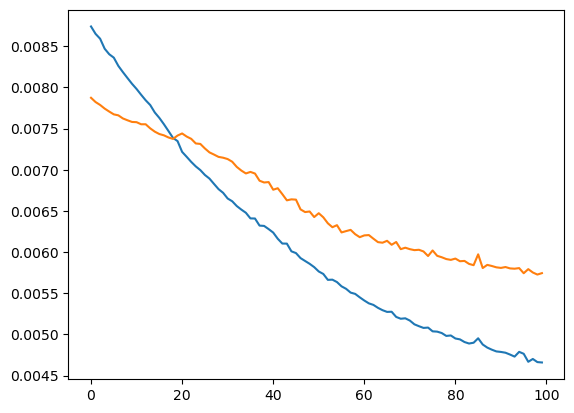

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])